 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
#Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
#Reading whale returns
csvreader_whale = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(csvreader_whale)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
#Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
#Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
#Set the index to the date
whale_returns = whale_returns.dropna()
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns =['Date'], inplace=True)
whale_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
#Reading algorithmic returns
csvreader_algo = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(csvreader_algo)
algo_returns.head(5)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [7]:
#Count nulls
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
#Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [9]:
#Set the index to the date
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns =['Date'], inplace=True)
algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
#Reading S&P 500 Closing Prices
csvreader_sp500 = Path("Resources/sp500_history.csv")
sp500_closing_prices = pd.read_csv(csvreader_sp500)

In [11]:
#Check Data Types
sp500_closing_prices.dtypes

Date     object
Close    object
dtype: object

In [12]:
#Fix Data Types
sp500_closing_prices.set_index(pd.to_datetime(sp500_closing_prices['Date'], infer_datetime_format=True), inplace=True)
sp500_closing_prices.drop(columns =['Date'], inplace=True)
sp500_closing_prices['Close'] = sp500_closing_prices['Close'].str.replace('$', '')
sp500_closing_prices['Close'] = sp500_closing_prices['Close'].astype('float')

/var/folders/82/szvr1kmj0hl1j121k98bfvch0000gn/T/ipykernel_21596/344689116.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_closing_prices['Close'] = sp500_closing_prices['Close'].str.replace('$', '')


In [13]:
#Reverse the order of the index
sp500_closing_prices = sp500_closing_prices.iloc[::-1]

In [14]:
#Calculate Daily Returns
sp500_daily_returns = sp500_closing_prices.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
#Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
#Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close' : 'Daily Return'}, inplace=True) 
sp500_daily_returns.head()

,Daily Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_dataframe = sp500_daily_returns.join(whale_returns[['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC']], on='Date').join(algo_returns[['Algo 1','Algo 2']], on='Date')
#Renaming the columns for portfolio names
combined_returns_dataframe.columns = ['S&P 500 Return','SOROS FUND MANAGEMENT LLC Return','PAULSON & CO. INC. Return', 'TIGER GLOBAL MANAGEMENT LLC Return', 'BERKSHIRE HATHAWAY INC Return', 'Algo 1 Return', 'Algo 2 Return']
combined_returns_dataframe.sample(5)

,S&P 500 Return,SOROS FUND MANAGEMENT LLC Return,PAULSON & CO. INC. Return,TIGER GLOBAL MANAGEMENT LLC Return,BERKSHIRE HATHAWAY INC Return,Algo 1 Return,Algo 2 Return
Date,,,,,,,
2014-06-23,-0.000132,NaN,NaN,NaN,NaN,-0.004532,-0.000615
2013-09-05,0.001210,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-09,0.000390,-0.006862,0.010743,0.007833,0.002678,0.002393,-0.002178
2016-01-21,0.005195,0.008036,0.002368,0.019821,-0.008080,0.026359,0.009416
2015-03-16,0.013534,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117


In [18]:
#Remove nulls for standaridizing data
combined_returns_dataframe = combined_returns_dataframe.dropna()
combined_returns_dataframe.isnull().sum()
combined_returns_dataframe.head(5)

,S&P 500 Return,SOROS FUND MANAGEMENT LLC Return,PAULSON & CO. INC. Return,TIGER GLOBAL MANAGEMENT LLC Return,BERKSHIRE HATHAWAY INC Return,Algo 1 Return,Algo 2 Return
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns 2015 - 2019'}, xlabel='Date', ylabel='Daily Return'>

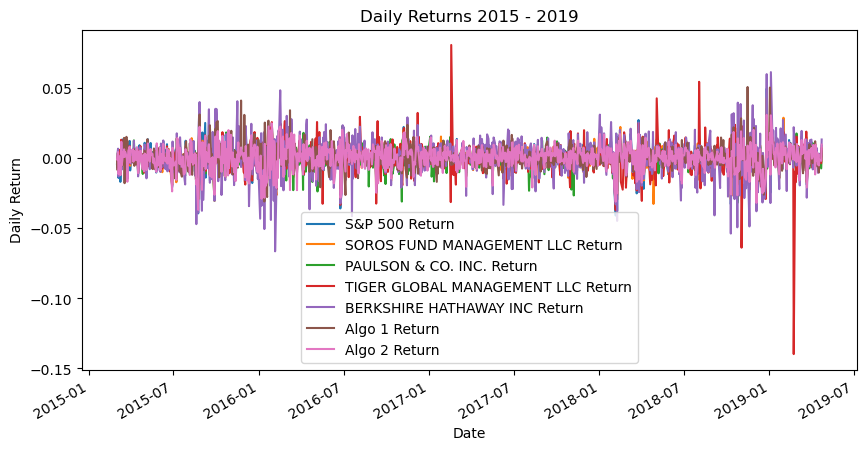

In [19]:
#Plot daily returns of all portfolios
combined_returns_dataframe.plot(figsize=(10,5),title="Daily Returns 2015 - 2019",ylabel="Daily Return",xlabel="Date")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Return (2015 - 2019)'}, xlabel='Date', ylabel='Return (%)'>

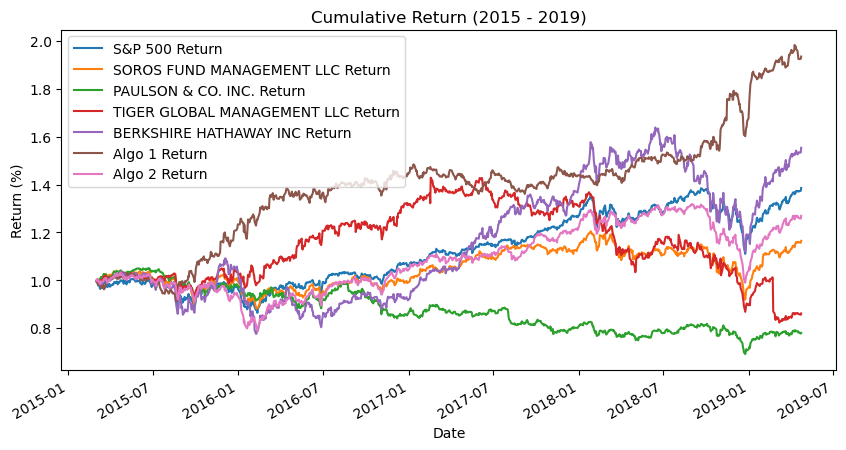

In [20]:
#Calculate cumulative returns of all portfolios
cum_return_all = (1 + combined_returns_dataframe).cumprod()

#Plot cumulative returns
cum_return_all.loc['2015-03-03':'2019-04-23'].plot(figsize=(10,5),title="Cumulative Return (2015 - 2019)",ylabel = "Return (%)", xlabel="Date")

### RESULTS:
The Berkshire Hathaway Inc portfolio outperforms the S&P 500. Additionally, Algo 1 also outperforms the S&P 500

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Box Plot of Daily Returns'}>

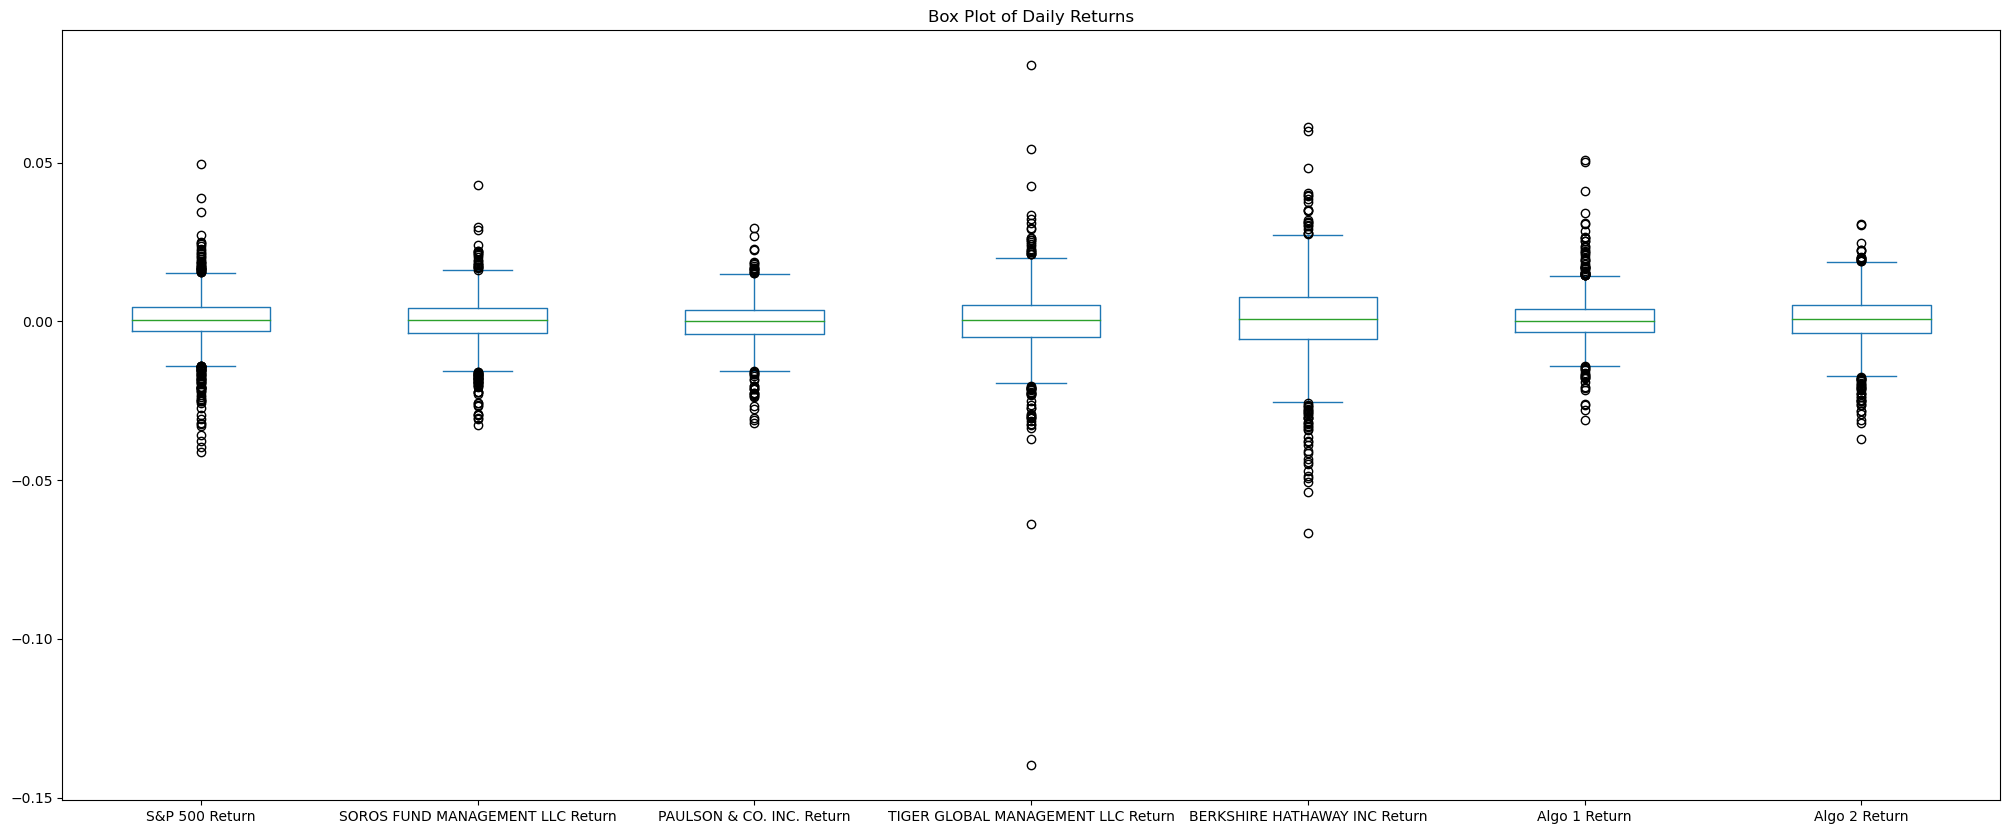

In [21]:
#Box plot to visually show risk
combined_returns_dataframe.plot.box(figsize =(25,10), title="Box Plot of Daily Returns", )

### Calculate Standard Deviations

In [22]:
#Calculate the daily standard deviations of all portfolios
combined_std_dataframe = combined_returns_dataframe.std()
combined_std_dataframe

S&P 500 Return                        0.008554
SOROS FUND MANAGEMENT LLC Return      0.007895
PAULSON & CO. INC. Return             0.007023
TIGER GLOBAL MANAGEMENT LLC Return    0.010894
BERKSHIRE HATHAWAY INC Return         0.012919
Algo 1 Return                         0.007620
Algo 2 Return                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
#Calculate the daily standard deviation of S&P 500
sp500_std = combined_returns_dataframe["S&P 500 Return"].std()
print(round(sp500_std,4))

0.0086


In [24]:
#Determine which portfolios are riskier than the S&P 500
combined_std_dataframe > sp500_std

S&P 500 Return                        False
SOROS FUND MANAGEMENT LLC Return      False
PAULSON & CO. INC. Return             False
TIGER GLOBAL MANAGEMENT LLC Return     True
BERKSHIRE HATHAWAY INC Return          True
Algo 1 Return                         False
Algo 2 Return                         False
dtype: bool

### Results:

TIGER GLOBAL MANAGEMENT LLC (0.010894 std.dev) and BERKSHIRE HATHAWAY INC (0.012919 std.dev) are riskier than the S&P 500 (0.0086).

### Calculate the Annualized Standard Deviation

In [25]:
#Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std_dataframe * np.sqrt(252)
annualized_std

S&P 500 Return                        0.135786
SOROS FUND MANAGEMENT LLC Return      0.125335
PAULSON & CO. INC. Return             0.111488
TIGER GLOBAL MANAGEMENT LLC Return    0.172936
BERKSHIRE HATHAWAY INC Return         0.205077
Algo 1 Return                         0.120967
Algo 2 Return                         0.132430
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling Standard Deviation 21-Days'}, xlabel='Date'>

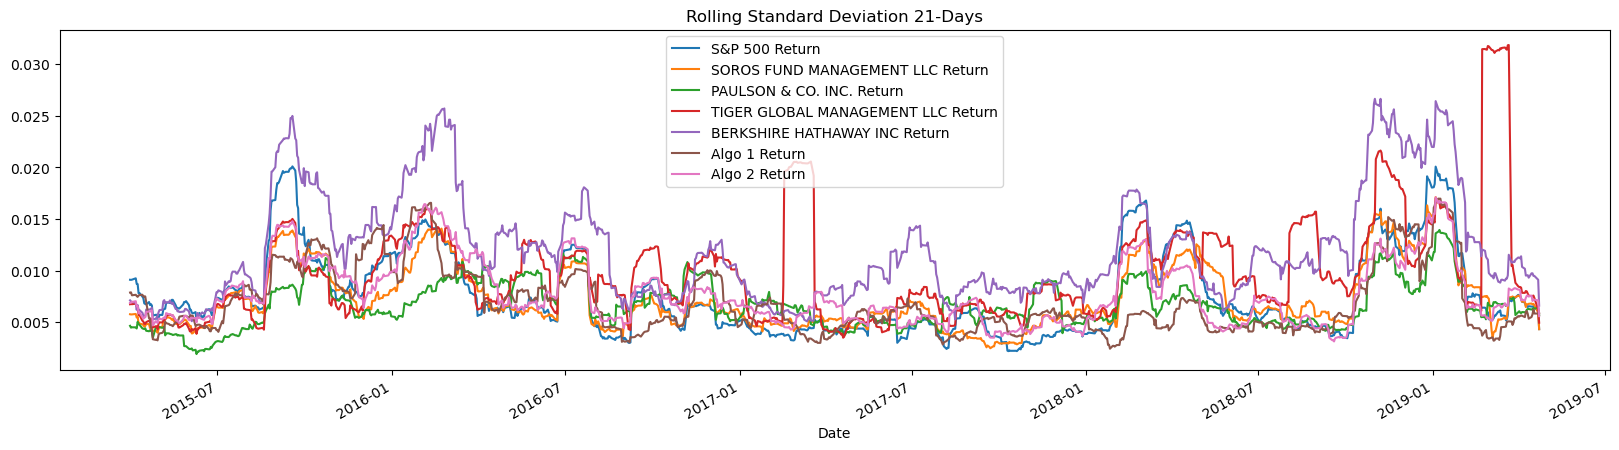

In [26]:
#Calculate the rolling standard deviation for all portfolios using a 21-day window & plot
combined_returns_dataframe.rolling(window=21).std().plot(figsize=(20,5),title="Rolling Standard Deviation 21-Days")


### Results:

Except for a brief period in 2017, where the Berkshire Hathaway's risk profile does not mirror the S&P 500, most portfolios increase at in risk at the same time as the S&P500, at a lesser degree.

### Calculate and plot the correlation

In [27]:
#Calculate the correlation
#Use the `corr` function to calculate correlations for each portfolio, algo, and S&P 500
correlation = combined_returns_dataframe.corr()

#Display de correlation matrix
correlation


,S&P 500 Return,SOROS FUND MANAGEMENT LLC Return,PAULSON & CO. INC. Return,TIGER GLOBAL MANAGEMENT LLC Return,BERKSHIRE HATHAWAY INC Return,Algo 1 Return,Algo 2 Return
S&P 500 Return,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC Return,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO. INC. Return,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC Return,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC Return,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1 Return,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2 Return,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


<Axes: >

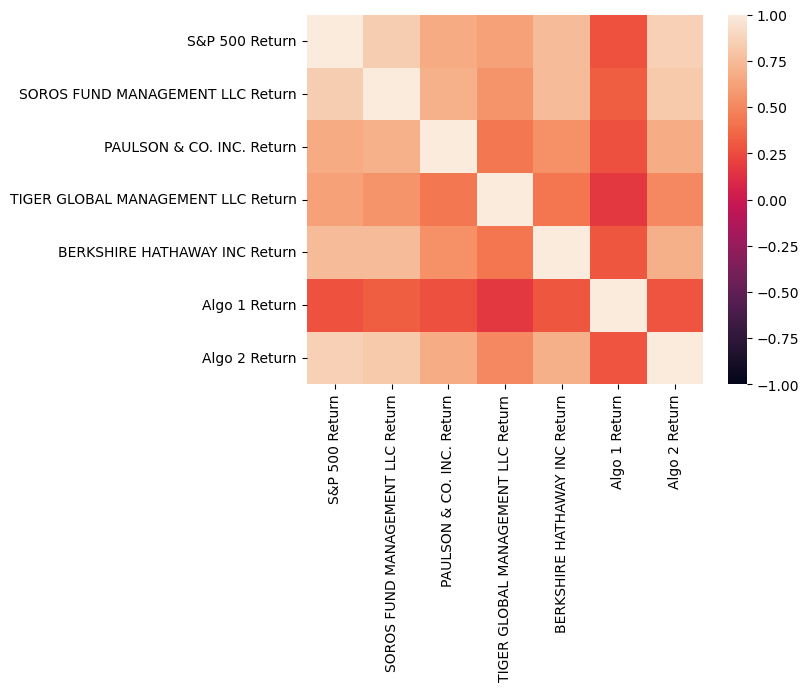

In [28]:
#Heatmap to plot the correlations
sns.heatmap(correlation, vmin=-1, vmax=1)



<Axes: title={'center': 'S&P 500 & Algo 2 CORRELATION'}, xlabel='S&P 500 Return', ylabel='Algo 2 Return'>

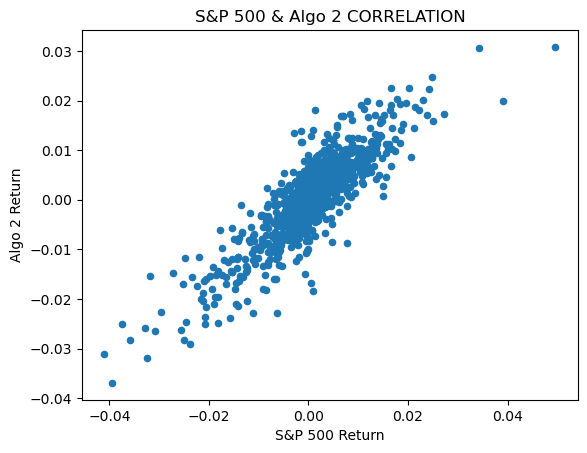

In [29]:
#Scatter Plots to see individual correlation of portfolios and algos
combined_returns_dataframe.plot(kind='scatter', x='S&P 500 Return', y='Algo 2 Return', title ="S&P 500 & Algo 2 CORRELATION")

<Axes: title={'center': 'S&P 500 & Algo 1 CORRELATION'}, xlabel='S&P 500 Return', ylabel='Algo 1 Return'>

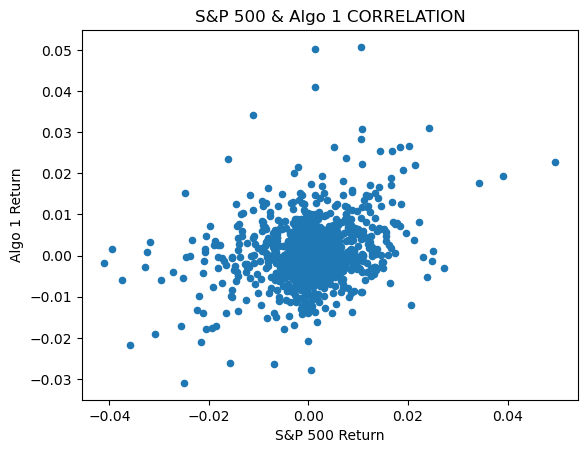

In [30]:
#Scatter Plots to see individual correlation of portfolios and algos
combined_returns_dataframe.plot(kind='scatter', x='S&P 500 Return', y='Algo 1 Return', title ="S&P 500 & Algo 1 CORRELATION")

<Axes: title={'center': 'S&P 500 & BERKSHIRE HATHAWAY CORRELATION'}, xlabel='S&P 500 Return', ylabel='BERKSHIRE HATHAWAY INC Return'>

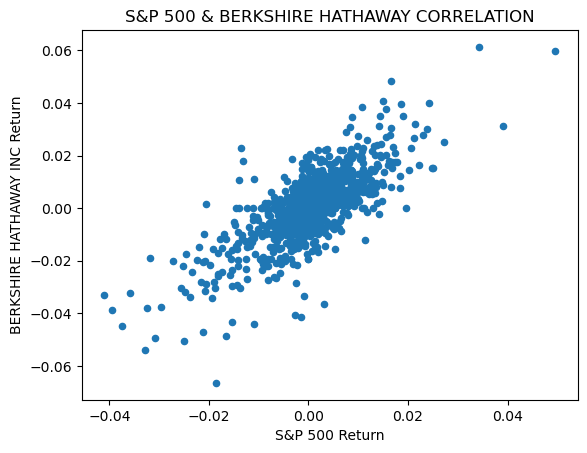

In [31]:
#Scatter Plots to see individual correlation of portfolios and algos
combined_returns_dataframe.plot(kind='scatter', x='S&P 500 Return', y='BERKSHIRE HATHAWAY INC Return', title ="S&P 500 & BERKSHIRE HATHAWAY CORRELATION")

<Axes: title={'center': 'S&P 500 & TIGER GLOBAL CORRELATION'}, xlabel='S&P 500 Return', ylabel='TIGER GLOBAL MANAGEMENT LLC Return'>

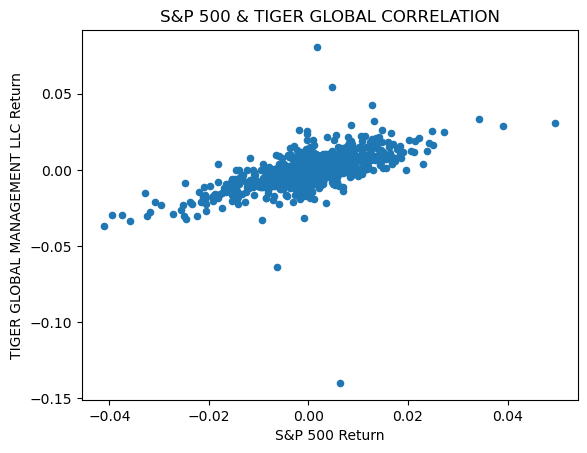

In [32]:
#Scatter Plots to see individual correlation of portfolios and algos
combined_returns_dataframe.plot(kind='scatter', x='S&P 500 Return', y='TIGER GLOBAL MANAGEMENT LLC Return', title ="S&P 500 & TIGER GLOBAL CORRELATION")

<Axes: title={'center': 'S&P 500 & PAULSON CORRELATION'}, xlabel='S&P 500 Return', ylabel='PAULSON & CO. INC. Return'>

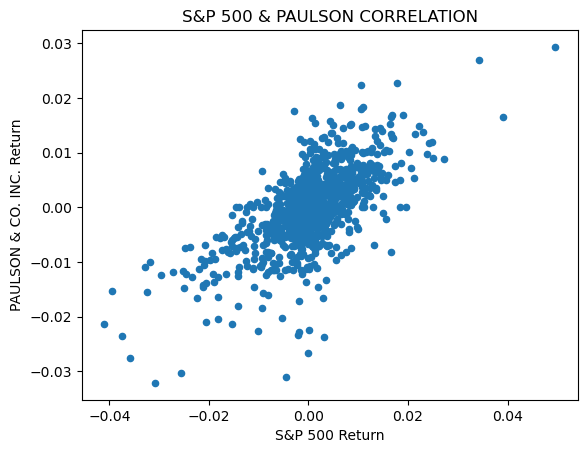

In [33]:
#Scatter Plots to see individual correlation of portfolios and algos
combined_returns_dataframe.plot(kind='scatter', x='S&P 500 Return', y='PAULSON & CO. INC. Return', title ="S&P 500 & PAULSON CORRELATION")

<Axes: title={'center': 'S&P 500 & SOROS FUND CORRELATION'}, xlabel='S&P 500 Return', ylabel='SOROS FUND MANAGEMENT LLC Return'>

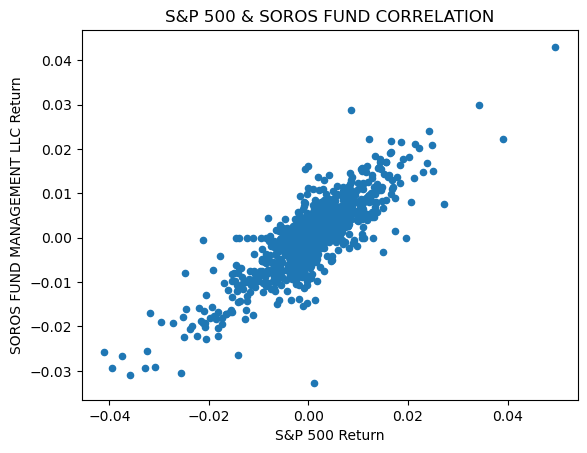

In [34]:
#Scatter Plots to see individual correlation of portfolios and algos
combined_returns_dataframe.plot(kind='scatter', x='S&P 500 Return', y='SOROS FUND MANAGEMENT LLC Return', title ="S&P 500 & SOROS FUND CORRELATION")


### Results:
Based on the analysis, Algo 2 (0.8587) is a close mimic to the S&P 500.  Soros is a second close mimic at 0.8378.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60-day Beta of Berkshire Hathaway Portfolio'}, xlabel='Date'>

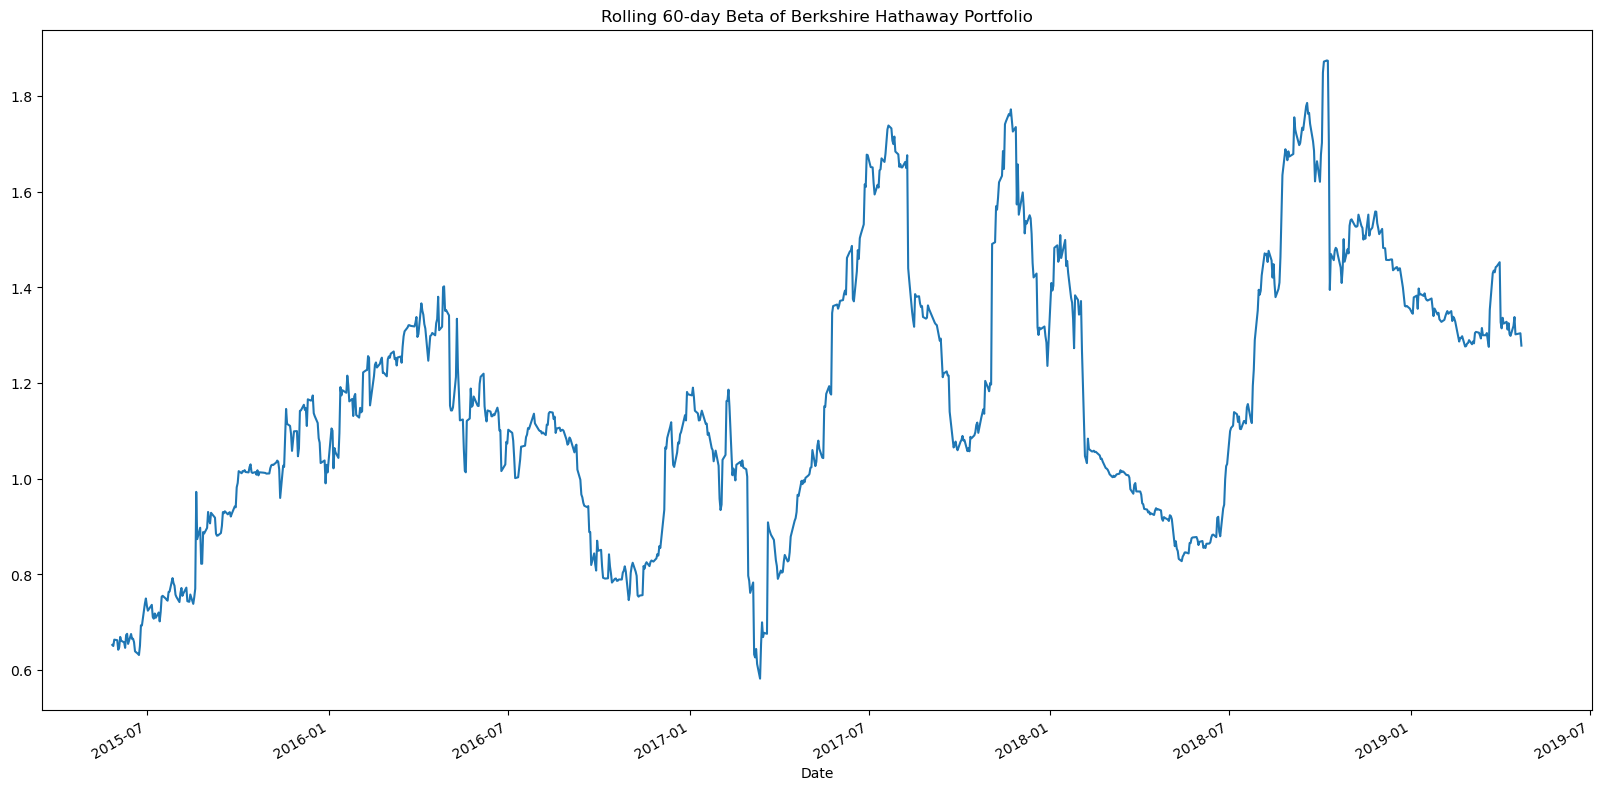

In [35]:
#Calculate covariance of a single portfolio, using Berkshire Hathaway
berkshire_covariance = combined_returns_dataframe['BERKSHIRE HATHAWAY INC Return'].cov(combined_returns_dataframe['S&P 500 Return'])

#Calculate variance of S&P 500
variance_sp500 = combined_returns_dataframe["S&P 500 Return"].var()
#Computing beta
berkshire_beta = berkshire_covariance/variance_sp500

#Plot beta trend
#calculate rolling covariance for berkshire using 60 day window
rolling_berkshire_covariance = combined_returns_dataframe['BERKSHIRE HATHAWAY INC Return'].rolling(window=60).cov(combined_returns_dataframe['S&P 500 Return'])
#calculate rolling variance for S&P 500 using 60 day window
rolling_variance = combined_returns_dataframe['S&P 500 Return'].rolling(window=60).var()
#calculate 60-day rolling beta of Berkshire and plot the data
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_variance
rolling_berkshire_beta.plot(figsize=(20,10), title="Rolling 60-day Beta of Berkshire Hathaway Portfolio")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

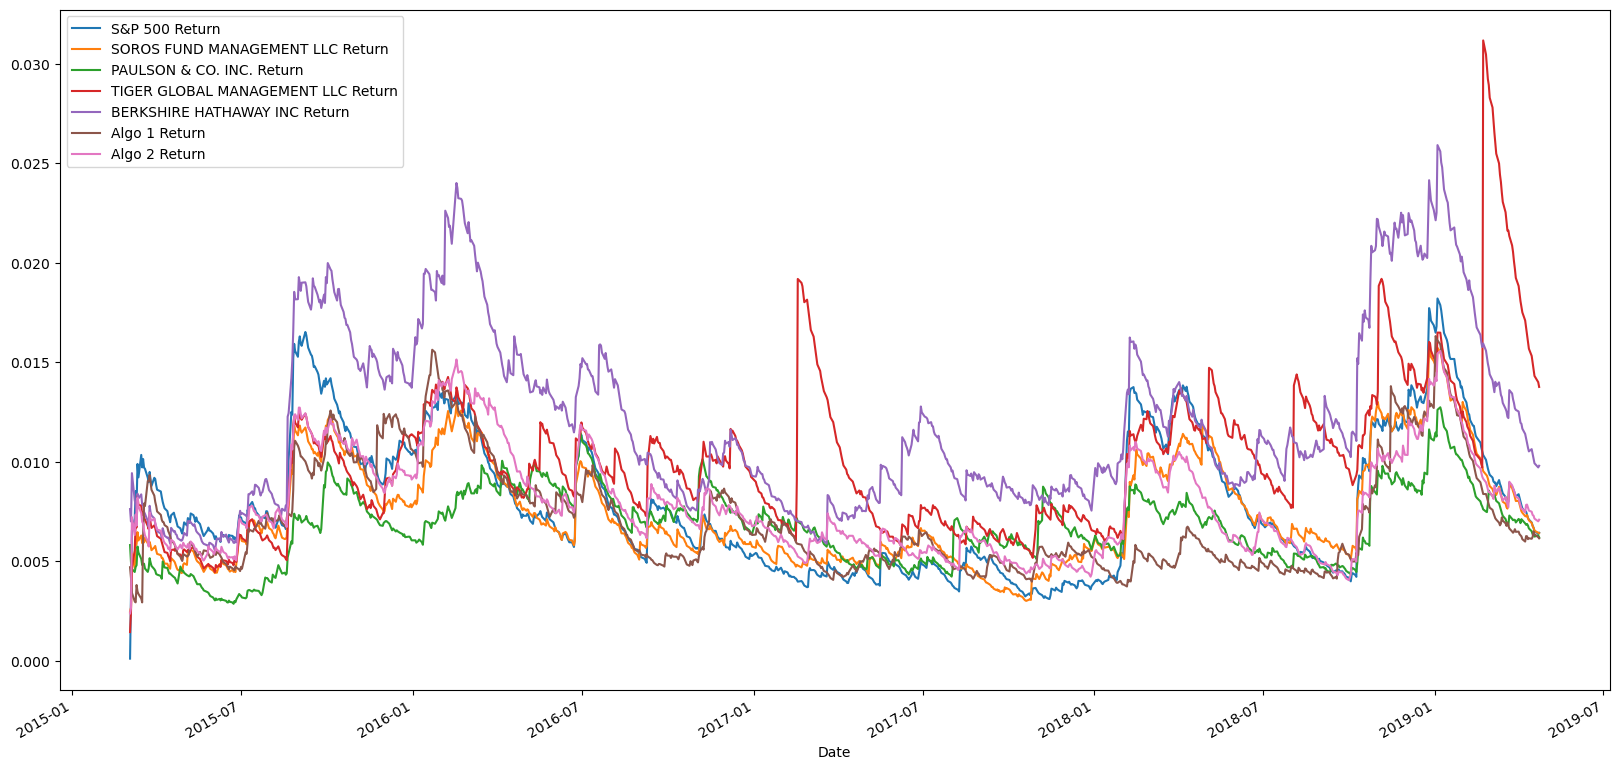

In [36]:
#Use `ewm` to calculate the rolling window 21 days for standard deviation
combined_returns_dataframe.ewm(com=21,adjust=True).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
#Calculate Sharpe ratios with a risk free rate of 0 as none was provided
sharpe_ratios = ((combined_returns_dataframe.mean()) * 252) / (combined_returns_dataframe.std() * np.sqrt(252))
sharpe_ratios

#10 Year Treasury Rate (I:10YTCMR) is equal to 3.81% for Jun 30 2023 - source: https://ycharts.com/indicators/10_year_treasury_rate

S&P 500 Return                        0.648267
SOROS FUND MANAGEMENT LLC Return      0.356417
PAULSON & CO. INC. Return            -0.483570
TIGER GLOBAL MANAGEMENT LLC Return   -0.121060
BERKSHIRE HATHAWAY INC Return         0.621810
Algo 1 Return                         1.378648
Algo 2 Return                         0.501364
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

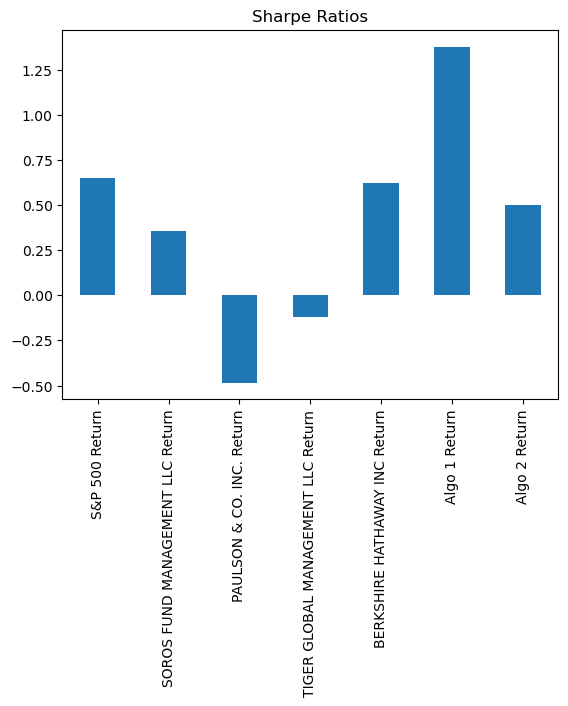

In [38]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1: Algorithmic strategy 1 outperforms both the S&P 500 and all whale portfolios

Algo 2: Algorithmic strategy 2 underperforms the S&P 500 and Berkshire Hathaway, but outperforms Soros Fund, Paulson & CO, and Tiger Global.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
#Reading data from 1st stock
csvreader_amazon = Path("Resources/danes_portfolio_amazon_v2.csv")
amazon_close = pd.read_csv(csvreader_amazon,index_col="Date", parse_dates=True, infer_datetime_format=True)
amazon_close.columns = ["AMZN"]

In [40]:
#Reading data from 2nd stock
csvreader_ford = Path("Resources/danes_portfolio_ford_v2.csv")
ford_close = pd.read_csv(csvreader_ford,index_col="Date", parse_dates=True, infer_datetime_format=True)
ford_close.columns = ["F"]

In [41]:
#Reading data from 3rd stock
csvreader_mdt = Path("Resources/danes_portfolio_mdt_v2.csv")
mdt_close = pd.read_csv(csvreader_mdt,index_col="Date", parse_dates=True, infer_datetime_format=True)
mdt_close.columns = ["MDT"]

In [42]:
#Reading data from 4th stock
csvreader_netflix = Path("Resources/danes_portfolio_netflix_v2.csv")
netflix_close = pd.read_csv(csvreader_netflix,index_col="Date", parse_dates=True, infer_datetime_format=True)
netflix_close.columns = ["NFLX"]

In [43]:
#Reading data from 5th stock
csvreader_pnc = Path("Resources/danes_portfolio_pnc_v2.csv")
pnc_close = pd.read_csv(csvreader_pnc,index_col="Date", parse_dates=True, infer_datetime_format=True)
pnc_close.columns = ["PNC"]

In [44]:
#Combine all stocks in a single DataFrame
portfolio_df = pd.concat([amazon_close,ford_close,mdt_close,netflix_close,pnc_close],axis="columns",join="inner")
portfolio_df.head()

,AMZN,F,MDT,NFLX,PNC
Date,,,,,
2015-03-02 16:00:00,19.28,16.57,78.83,68.61,92.95
2015-03-03 16:00:00,19.23,16.17,78.03,67.82,92.33
2015-03-04 16:00:00,19.14,16.03,78.19,67.11,92.07
2015-03-05 16:00:00,19.39,16.11,78.50,66.81,92.54
2015-03-06 16:00:00,19.00,15.93,76.48,64.87,93.73


In [45]:
#Calculate daily returns & drop NAs
portfolio_returns = portfolio_df.pct_change().dropna()
portfolio_returns.index = portfolio_returns.index.floor('D')


#Display sample data
portfolio_returns.head()


,AMZN,F,MDT,NFLX,PNC
Date,,,,,
2015-03-03,-0.002593,-0.024140,-0.010148,-0.011514,-0.006670
2015-03-04,-0.004680,-0.008658,0.002050,-0.010469,-0.002816
2015-03-05,0.013062,0.004991,0.003965,-0.004470,0.005105
2015-03-06,-0.020113,-0.011173,-0.025732,-0.029038,0.012859
2015-03-09,-0.003684,0.006277,0.005492,-0.018653,0.008535


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
#Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

#Calculate portfolio return
portfolio_weighted_returns = portfolio_returns.dot(weights)
portfolio_weighted_returns_df = pd.DataFrame(portfolio_weighted_returns, columns=["Portfolio"])

#Display sample data
portfolio_weighted_returns_df.head()


,Portfolio
Date,
2015-03-03,-0.011013
2015-03-04,-0.004915
2015-03-05,0.004530
2015-03-06,-0.014639
2015-03-09,-0.000407


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
#Join your returns DataFrame to the original returns DataFrame

#Convert the index to a datetime type
portfolio_weighted_returns_df.index = pd.to_datetime(portfolio_weighted_returns_df.index)
#Drop the minutes and hours from the timestamp index
portfolio_weighted_returns_df.index = portfolio_weighted_returns_df.index.floor('D')

#Join the two dataframes together
analysis_df = portfolio_returns.join(portfolio_weighted_returns_df["Portfolio"], on='Date')

analysis_df.head()

,AMZN,F,MDT,NFLX,PNC,Portfolio
Date,,,,,,
2015-03-03,-0.002593,-0.024140,-0.010148,-0.011514,-0.006670,-0.011013
2015-03-04,-0.004680,-0.008658,0.002050,-0.010469,-0.002816,-0.004915
2015-03-05,0.013062,0.004991,0.003965,-0.004470,0.005105,0.004530
2015-03-06,-0.020113,-0.011173,-0.025732,-0.029038,0.012859,-0.014639
2015-03-09,-0.003684,0.006277,0.005492,-0.018653,0.008535,-0.000407


In [48]:
#Only compare dates where return data exists for all the stocks (drop NaNs)
analysis_df.isnull().sum()
#No need to drop any data


AMZN         0
F            0
MDT          0
NFLX         0
PNC          0
Portfolio    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [49]:
#Calculate the annualized `std`
volatility = analysis_df.std() * np.sqrt(252)
volatility


AMZN         0.299090
F            0.242524
MDT          0.187959
NFLX         0.424901
PNC          0.209973
Portfolio    0.188067
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Std Deviation (Rolling 21-days) for Portfolio'}, xlabel='Date'>

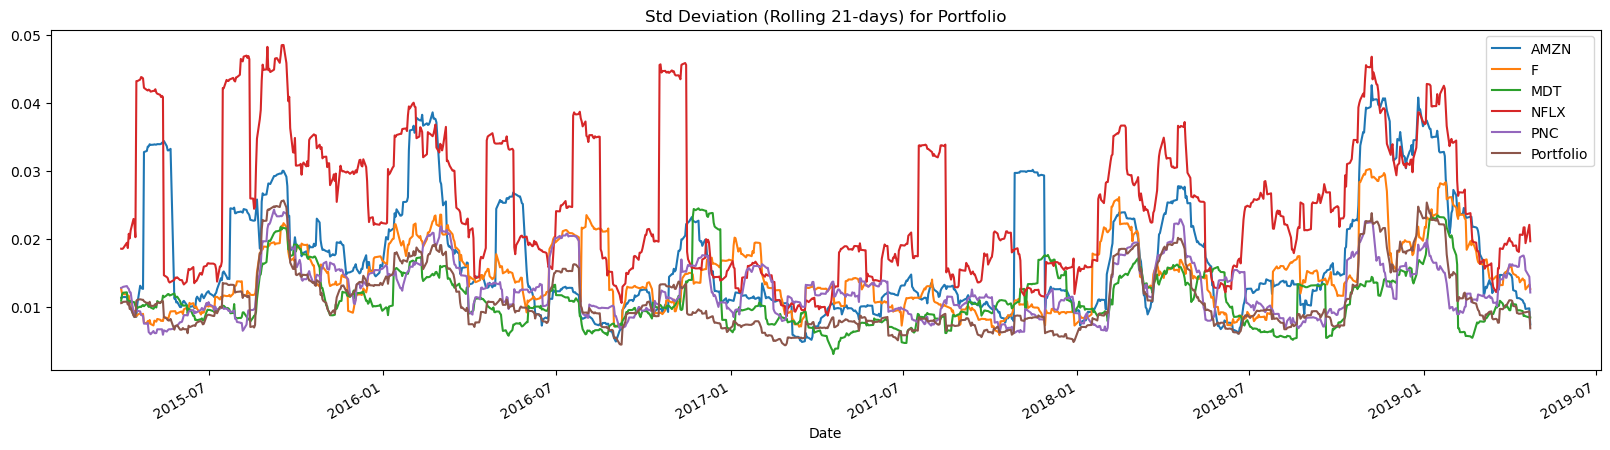

In [50]:
#Calculate rolling standard deviation
rolling_std = analysis_df.rolling(window=21).std()

#Plot rolling standard deviation
rolling_std.plot(figsize = (20,5), title="Std Deviation (Rolling 21-days) for Portfolio")


### Calculate and plot the correlation

In [51]:
#Calculate and plot the correlation
correlation2 = analysis_df.corr()
correlation2

,AMZN,F,MDT,NFLX,PNC,Portfolio
AMZN,1.000000,0.259354,0.359200,0.495887,0.300828,0.748004
F,0.259354,1.000000,0.259497,0.221764,0.484215,0.600605
MDT,0.359200,0.259497,1.000000,0.298976,0.316311,0.586790
NFLX,0.495887,0.221764,0.298976,1.000000,0.239639,0.780056
PNC,0.300828,0.484215,0.316311,0.239639,1.000000,0.615375
Portfolio,0.748004,0.600605,0.586790,0.780056,0.615375,1.000000


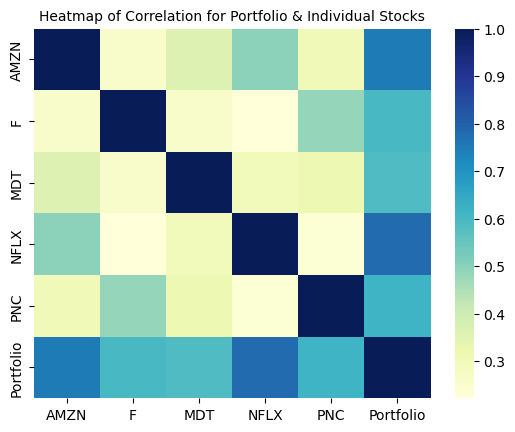

In [52]:
#Plot correlation
ax = sns.heatmap(correlation2, cmap="YlGnBu")
plt.title("Heatmap of Correlation for Portfolio & Individual Stocks", fontsize = 10)
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Portfolio & S&P 500 - 60 TSX'}, xlabel='Date'>

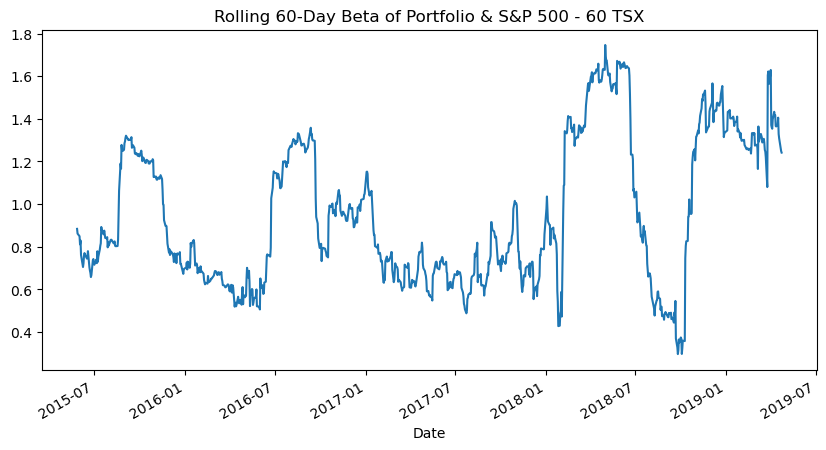

In [53]:
#Calculate and plot Beta
#Import a new CSV of SP500 data for date range from Google Finance (S&P 60 TSX)
csvpathsp500 = Path("Resources/danes_portfolio_sp500_v2.csv")
sp500_p_close = pd.read_csv(csvpathsp500,index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_p_close.columns = ["S&P 500 - 60 TSX"]
sp500_returns = sp500_p_close.pct_change().dropna()
sp500_returns.head()
#Convert the index to a datetime type
sp500_returns.index = pd.to_datetime(sp500_returns.index)
#Drop the minutes and hours from the timestamp index
sp500_returns.index = sp500_returns.index.floor('D')

#Combine into one new dataframe
analysis2_df = pd.concat([analysis_df,sp500_returns],axis="columns",join="inner")
analysis2_df

#Calculate information for Beta
portfolio_covariance = analysis2_df["Portfolio"].cov(analysis2_df["S&P 500 - 60 TSX"])
sp500_variance = analysis2_df["S&P 500 - 60 TSX"].var()

#Calculate Beta
portfolio_beta = portfolio_covariance / sp500_variance
portfolio_beta

#Rolling Metrics
rolling_portfolio_covariance = analysis2_df["Portfolio"].rolling(window=60).cov(analysis2_df['S&P 500 - 60 TSX'])
rolling_sp500_variance = analysis2_df['S&P 500 - 60 TSX'].rolling(window=60).var()
rolling_portfolio_beta = rolling_portfolio_covariance / rolling_sp500_variance

#Plot the rolling Beta
rolling_portfolio_beta.plot(figsize=(10, 5), title='Rolling 60-Day Beta of Portfolio & S&P 500 - 60 TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
#Calculate Annualized Sharpe Ratios
#Calculate Sharpe ratios with a risk free rate of 0
sharpe_ratios_2 = ((analysis2_df.mean()) * 252) / (analysis2_df.std() * np.sqrt(252))
sharpe_ratios_2

AMZN                1.321012
F                  -0.524488
MDT                 0.164972
NFLX                1.080315
PNC                 0.448259
Portfolio           0.907497
S&P 500 - 60 TSX    0.256283
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

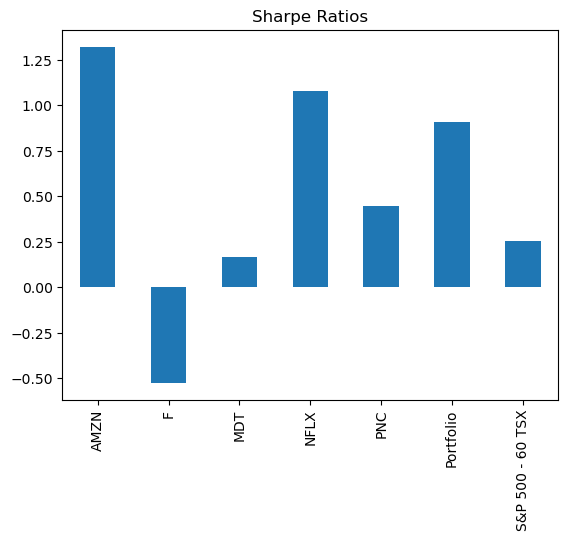

In [55]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar", title="Sharpe Ratios")

<Axes: title={'center': '$10K investment scenario return'}, xlabel='Date'>

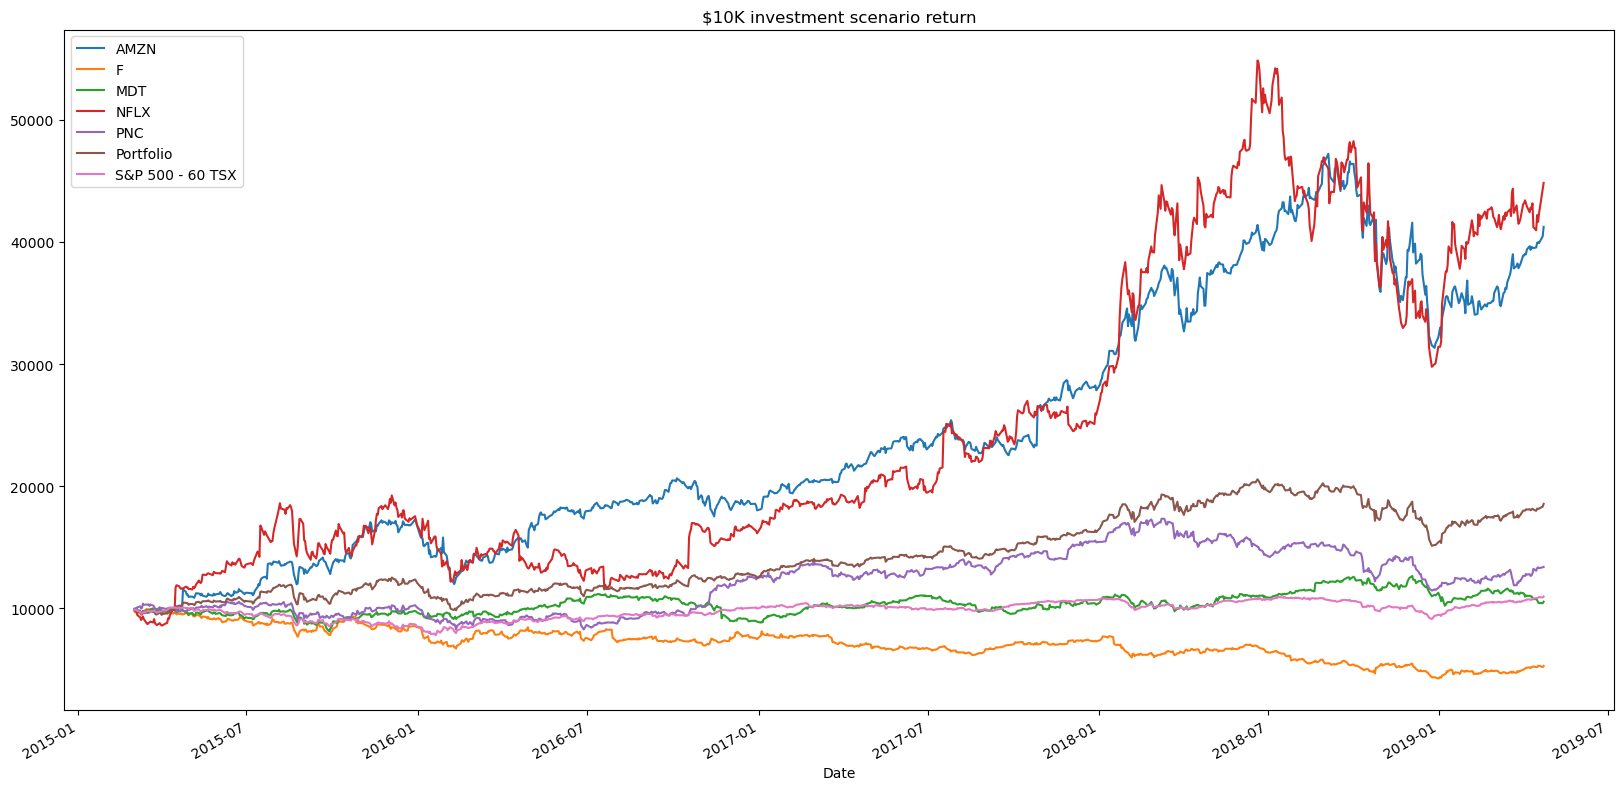

In [56]:
#Mock up $10K investment to see gains/losses over the period
initial_investment = 10000
analysis2_df_cumulative_returns = (1 + analysis2_df).cumprod()
analysis2_df_cumulative_profits = (initial_investment * analysis2_df_cumulative_returns)
analysis2_df_cumulative_profits.plot(figsize=(20,10), title="$10K investment scenario return")

In [57]:
#Calculating correlation with S&P 500 60 TSX included
correlation3 = analysis2_df.corr()
correlation3

,AMZN,F,MDT,NFLX,PNC,Portfolio,S&P 500 - 60 TSX
AMZN,1.000000,0.258384,0.353033,0.489576,0.291759,0.743284,0.403903
F,0.258384,1.000000,0.258975,0.221406,0.482437,0.602425,0.476911
MDT,0.353033,0.258975,1.000000,0.293919,0.312099,0.583362,0.384610
NFLX,0.489576,0.221406,0.293919,1.000000,0.234565,0.778330,0.325581
PNC,0.291759,0.482437,0.312099,0.234565,1.000000,0.611523,0.513601
Portfolio,0.743284,0.602425,0.583362,0.778330,0.611523,1.000000,0.592327
S&P 500 - 60 TSX,0.403903,0.476911,0.384610,0.325581,0.513601,0.592327,1.000000


### How does your portfolio do?

My portfolio exhibits strong excess reward associated with the invesment when balancing the portfolio at equal shares and accounting for risk with a 0.9075 Sharpe Ratio.  Although, investing solely in Amazon or Netflix would have yeiled a higher Sharpe Ratio and return, the risk was also higher as noted with the standard deviation.  Netflix and Amazon mirrored the portfolio for the most part, with Netflix having more drastic changes in stanard deviation (risk).  Amazon did not always correlate with the portfolio. Of all stocks, Netflix, followed by Amazon, had the highest correlations with the portfolio. The portfolio had pretty low correlation with the S&P 500 60 TSX, indicating a weak connection of performance moving with the index (correlations: 0.592327).  Looking forward in 2019, with a Beta over 1, the portfolio is more likely to change in price compared to S&P 500.  If I invested \$10,000 into the portfolio in 2015, by 2019, I would have netted close to \$18,000, a 80% return in 4 years. 